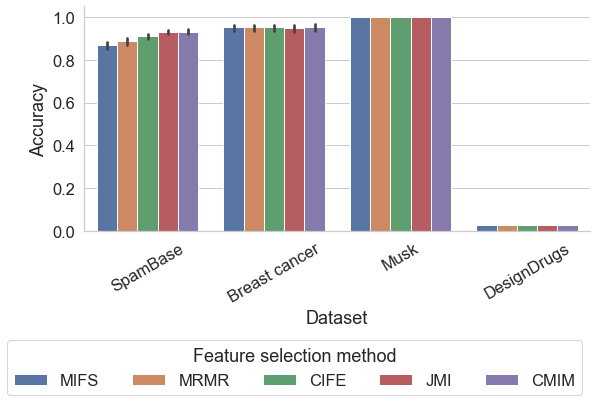

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('scikit-feature/results/result_acc.csv')

df = df.loc[df['dataset'].isin(['DesignDrugs', 'Breast cancer', 'Musk', 'SpamBase'])]

sns.set(font_scale=1.5, style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="dataset", y="accuracy", hue="method_name",
    height=4, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "Accuracy")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=5, title="Feature selection method")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
runtime = pd.read_csv('.././correlation_based_feature_selection/autofeat_results/all_results.csv')

FileNotFoundError: [Errno 2] No such file or directory: '.././correlation_based_feature_selection/autofeat_results/all_results.csv'

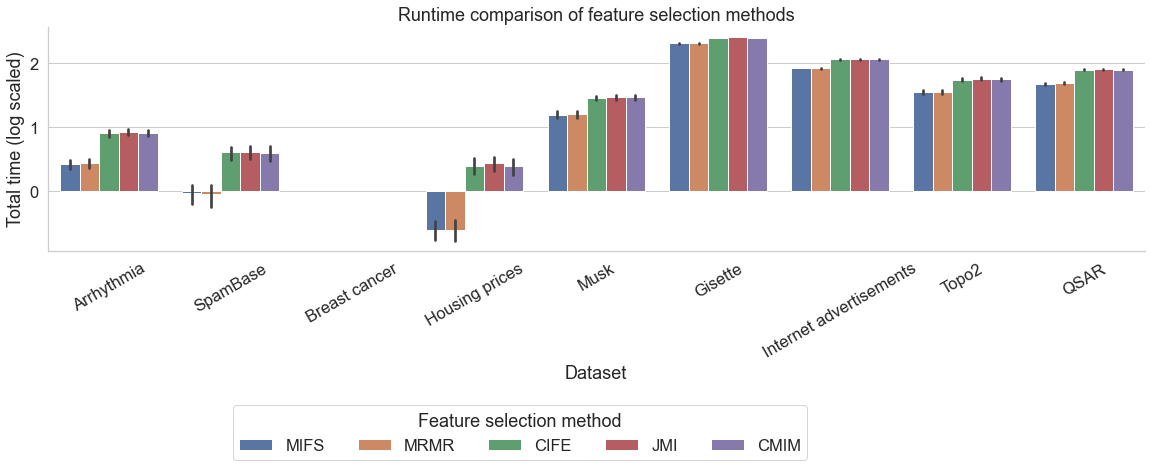

In [33]:

runtime['time'] = runtime['time'].apply(lambda x: np.log(x))

g = sns.catplot(
    data=runtime, kind="bar",
    x="DATASET NAME", y="CURRENT RUNTIME", hue="CORRELATION METHOD",
    height=4, aspect=4
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.title('Runtime comparison of feature selection methods')
g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "Total time (log scaled)")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -0.65), ncol=5, title="Feature selection method")

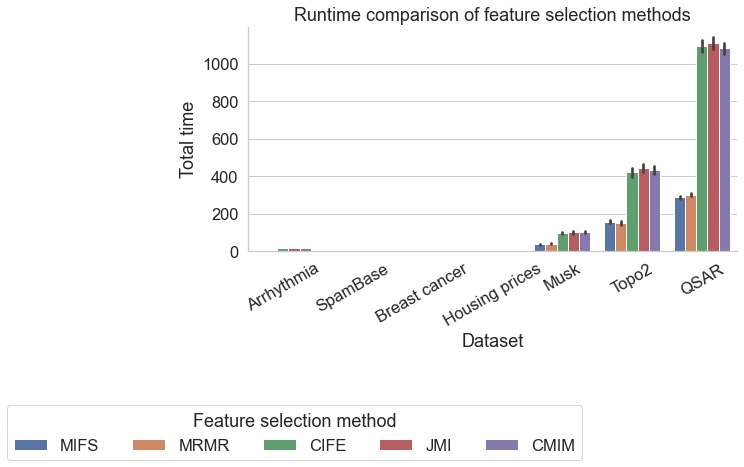

In [30]:
sliced = runtime.loc[-runtime['dataset'].isin(['Gisette', 'Internet advertisements'])]

g = sns.catplot(
    data=sliced, kind="bar",
    x="dataset", y="time", hue="method_name",
    height=4, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.title('Runtime comparison of feature selection methods')
g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "Total time")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -0.65), ncol=5, title="Feature selection method")

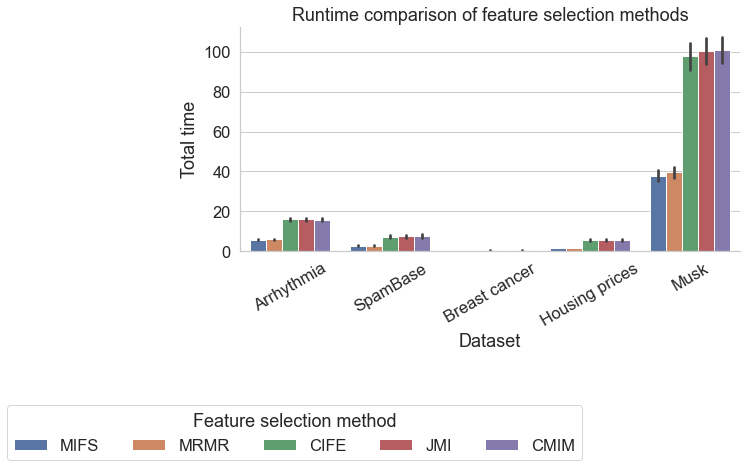

In [31]:
sliced = runtime.loc[-runtime['dataset'].isin(['Gisette', 'Internet advertisements', 'Topo2', 'QSAR'])]

g = sns.catplot(
    data=sliced, kind="bar",
    x="dataset", y="time", hue="method_name",
    height=4, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.title('Runtime comparison of feature selection methods')
g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "Total time")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -0.65), ncol=5, title="Feature selection method")

                    CURRENT PERFORMANCE  CURRENT RUNTIME CORRELATION METHOD
CORRELATION METHOD                                                         
Pearson                        0.915325         7.069690            Pearson
Spearman                       0.915068         6.336748           Spearman
SU                             0.909610        15.316969                 SU
IG                             0.911862        13.464511                 IG
Relief                         0.885267        47.634677             Relief


Text(0.5, 1.0, 'Averaged time and accuracy per method')

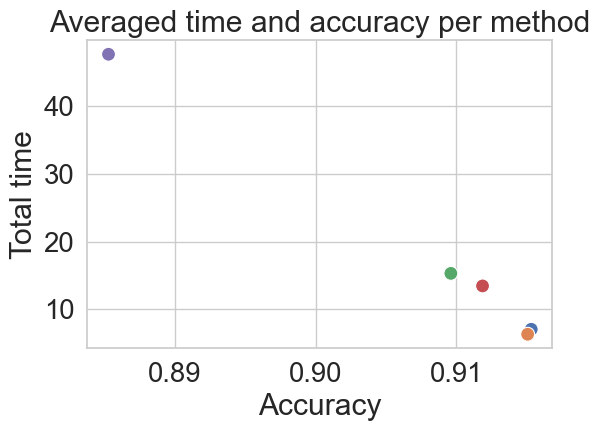

In [55]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=1.8, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results/all_results_accuracy.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

print(a)

g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=100
)

# for i, row in a[-a['method_name'].isin(['CIFE', 'JMI'])].iterrows():
#     plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(10,10), ha='center', fontsize=15)
#
# for i, row in a[a['method_name'].isin(['CIFE'])].iterrows():
#     plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-20,-10), ha='center', fontsize=15)
#
# for i, row in a[a['method_name'].isin(['JMI'])].iterrows():
#     plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=15)

g.set_ylabel('Total time')
g.set_xlabel('Accuracy')

plt.legend([],[], frameon=False)

plt.title('Averaged time and accuracy per method')
# plt.savefig('scikit-feature/results/information_theory_accuracy_runtime.pdf', dpi=300, bbox_inches="tight")

                    CURRENT PERFORMANCE  CURRENT RUNTIME CORRELATION METHOD
CORRELATION METHOD                                                         
Pearson                       91.532458         6.875873            Pearson
Spearman                      91.506831         6.218589           Spearman
SU                            90.961005        16.792949                 SU
IG                            91.186202        13.540462                 IG
Relief                        91.075323         7.076260             Relief


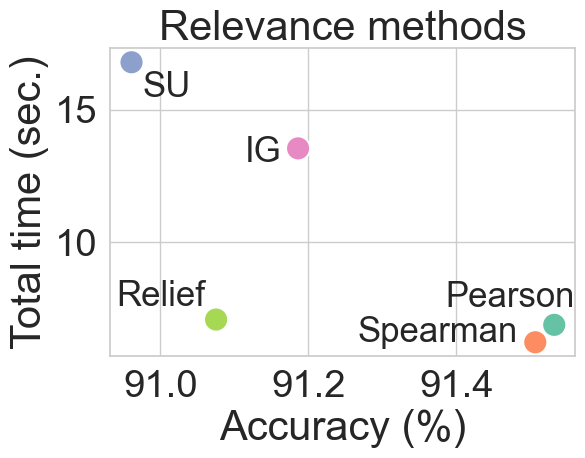

In [5]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results_GOOD/all_results_accuracy.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()

a["CURRENT PERFORMANCE"] = a["CURRENT PERFORMANCE"].multiply(100)
# b["CURRENT RUNTIME"] = b["CURRENT RUNTIME"].multiply(1000)

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

print(a)

# sns.color_palette("husl", 8)
g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=300, palette="Set2"
)
# sns.color_palette("husl", 8)

for i, row in a[a['CORRELATION METHOD'].isin(['Pearson'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-32,13), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Spearman'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-70,0), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Relief'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-40,10), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['SU'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(25,-25), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['IG'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-25,-10), ha='center', fontsize=25)

g.set_ylabel('Total time (sec.)') #labelpad=60)
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Relevance methods')
plt.savefig('relevance_methods_performance.pdf', dpi=1200,bbox_inches="tight")

                    CURRENT PERFORMANCE  CURRENT RUNTIME CORRELATION METHOD
CORRELATION METHOD                                                         
Pearson                       91.532458      6875.872758            Pearson
Spearman                      91.506831      6218.588694           Spearman
SU                            90.961005     16792.949281                 SU
IG                            91.186202     13540.462407                 IG
Relief                        91.075323      7076.260442             Relief


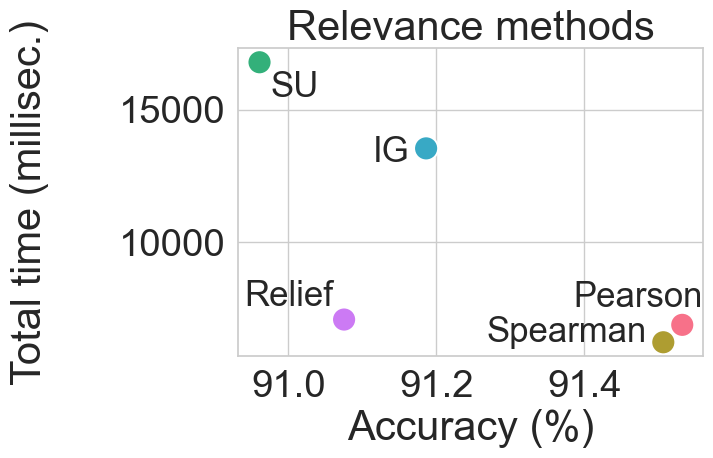

In [14]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results_GOOD/all_results_accuracy.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()

a["CURRENT PERFORMANCE"] = a["CURRENT PERFORMANCE"].multiply(100)
b["CURRENT RUNTIME"] = b["CURRENT RUNTIME"].multiply(1000)

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

print(a)

# sns.color_palette("husl", 8)
g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=300, palette="husl"
)

for i, row in a[a['CORRELATION METHOD'].isin(['Pearson'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-32,13), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Spearman'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-70,0), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Relief'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-40,10), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['SU'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(25,-25), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['IG'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-25,-10), ha='center', fontsize=25)

g.set_ylabel('Total time (millisec.)')
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Relevance methods')
plt.savefig('relevance_methods_performance.pdf', dpi=1200,bbox_inches="tight")